### Payoffs e funzioni profitto perdita con call e put
Yan Python for Finance second edition (2017) pag. 341

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
#import mibian

Convenzione X prezzo di esercizio (strike) S prezzo dell'azione alla scadenza dell'opzione)

$ 𝑝𝑎𝑦𝑜𝑓𝑓(𝑐𝑎𝑙𝑙)=𝑀𝑎𝑥(𝑆−X,0) $

$ 𝑝𝑎𝑦𝑜𝑓𝑓(𝑝𝑢𝑡)=𝑀𝑎𝑥(X−𝑆,0) $

In [2]:
def payoff_call(sT,x):
    return max(0, sT - x)
    #return (sT - x +abs(sT - x))/2

In [3]:
payoff_call(20,30)

0

In [5]:
payoff_call(30,20)

10

Grafico dei payoff

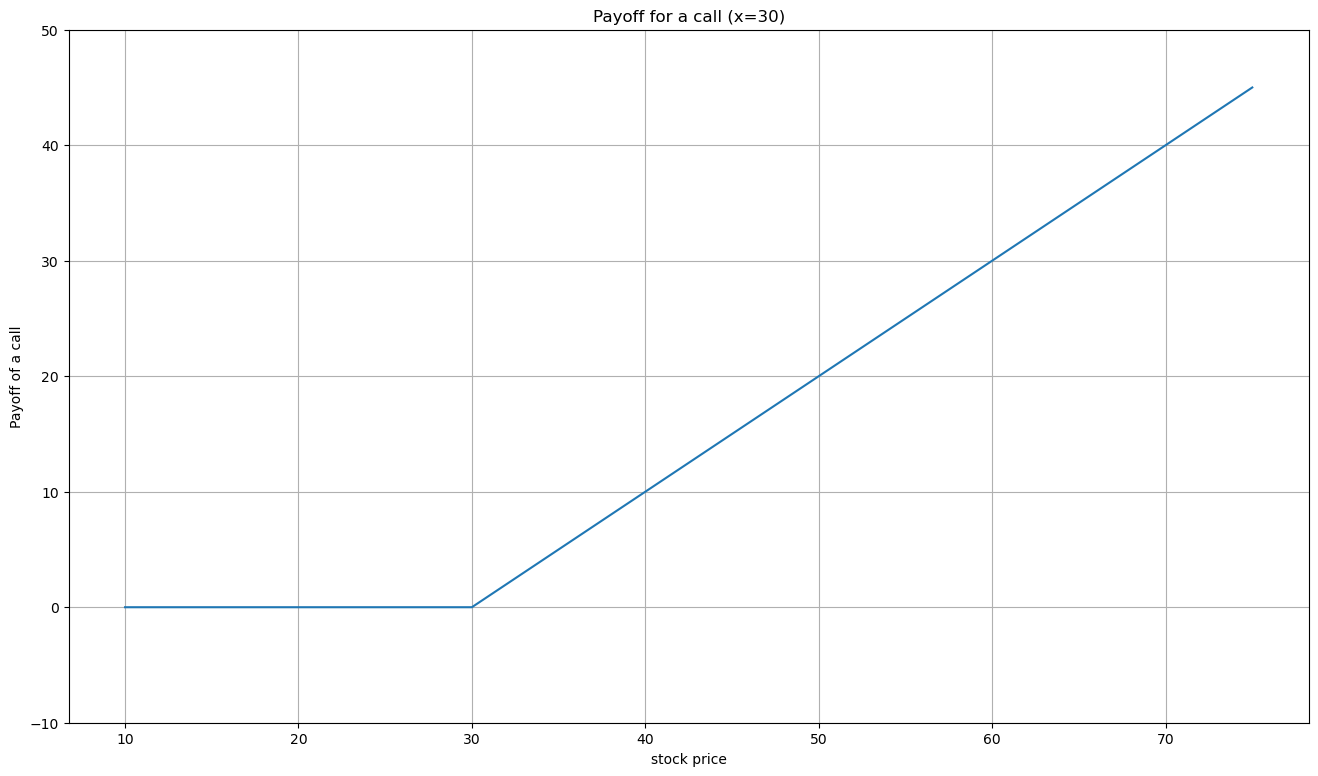

In [6]:

s = np.arange(10,80,5)
x=30
payoff=(abs(s-x)+s-x)/2
plt.figure(figsize=(16,9))
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.grid(True)
plt.show()

Profitti e perdite da acquisto o vendita di un'opzione  call

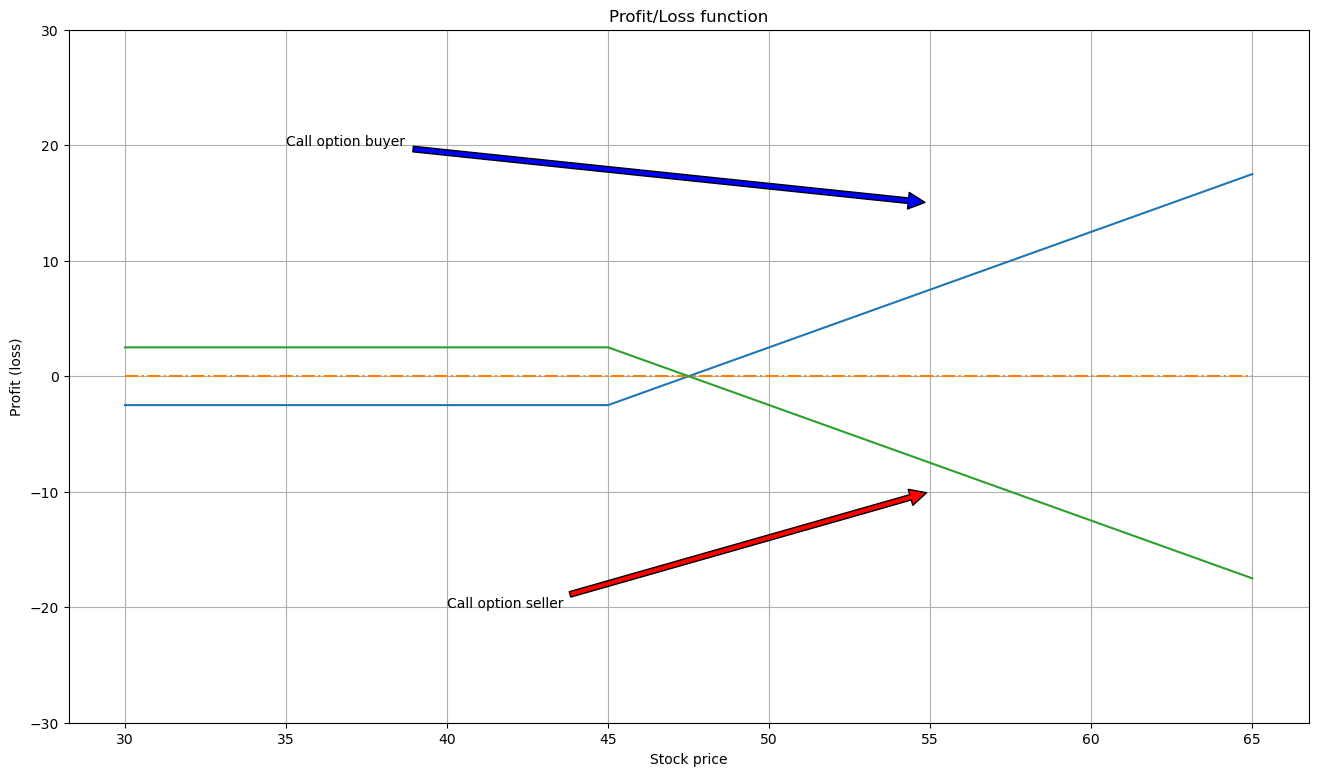

In [7]:



s = np.arange(30,70,5)
x=45;c=2.5
y=(abs(s-x)+s-x)/2 -c
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
plt.ylim(-30,30)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.title("Profit/Loss function")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,15), xytext=(35,20),
             arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
             arrowprops=dict(facecolor='red',shrink=0.01),)
plt.grid(True)
plt.show()

Profitti e perdite da acquisto o vendita di un'opzione put

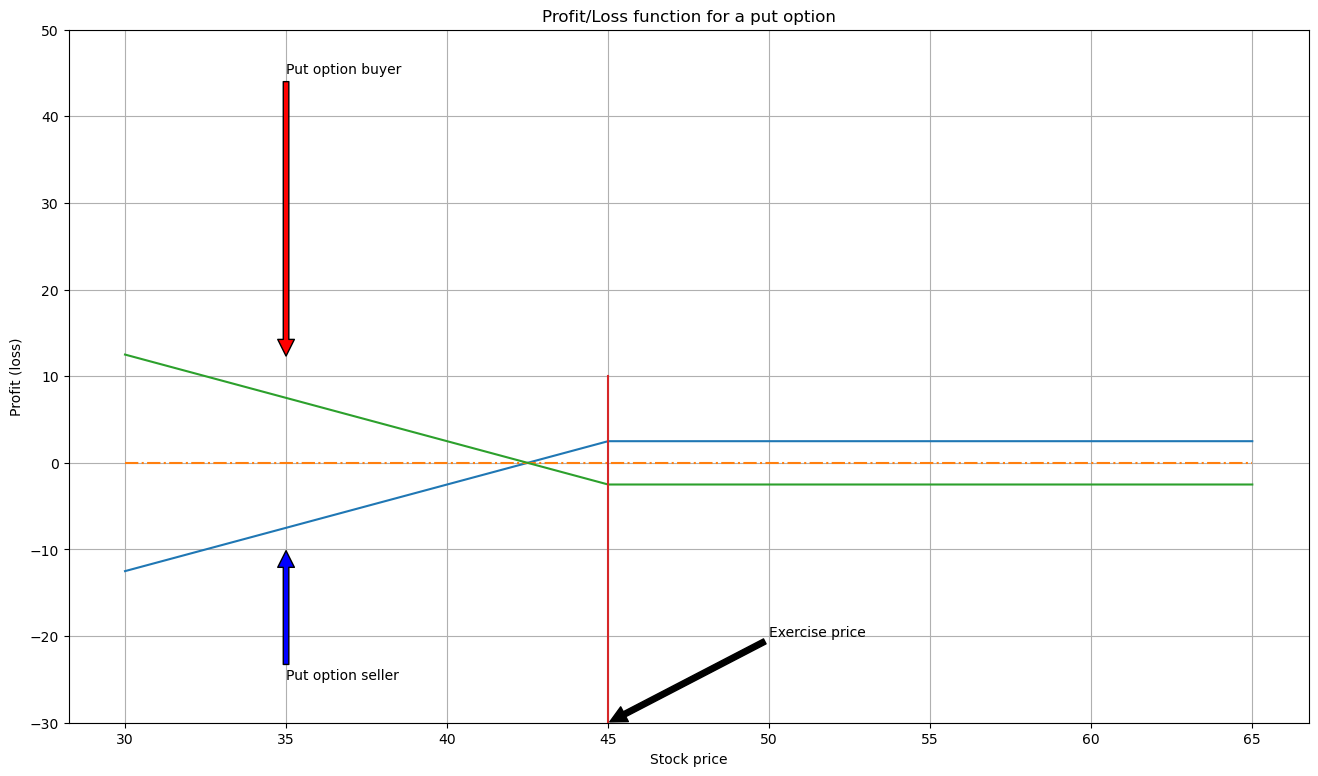

In [8]:


s = np.arange(30,70,5)
x=45;p=2;c=2.5
y=c-(abs(x-s)+x-s)/2 
y2=np.zeros(len(s))
plt.figure(figsize = (16,9))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,50)
plt.plot(s,y) 
plt.plot(s,y2,'-.') 
plt.plot(s,-y) 
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option") 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.grid(True)
plt.show()

### Formula di Black-Scholes-Merton

$$f_{c}=S_{0}\ N(d_1)-Ke^{-rT}\ N(d_2),$$
$$f_p = Ke^{-rT}\ N (-d_2)-S_0\ N(-d_1),$$
 
where,
 
$$ d_1 = \frac{log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt(T)}$$

$$ bins = \frac{max(values) - min(values)}{2 * \frac{IQR(values)}{\sqrt[3]{n}}$$

$$ d_2 = \frac{log(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt(T)}=d_1-\sigma\sqrt{T}$$

$$ bins = \frac{max(values) - min(values)}{2 * \frac{IQR(values)}{\sqrt[3]{n}}$$

In [9]:
from scipy import log,exp,sqrt,stats 
def bs_call(S,X,T,r,sigma):
    d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T)) 
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2)
    

Altra formula 


https://www.youtube.com/watch?v=FzeXWMlTDHY&t=353s

In [10]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [11]:
c = bs_call(40, 45, 0.5, 0.05, 0.25)
round(c, 3)

1.406

### Strategie con opzioni
#### Lungo azione  corto opzione call

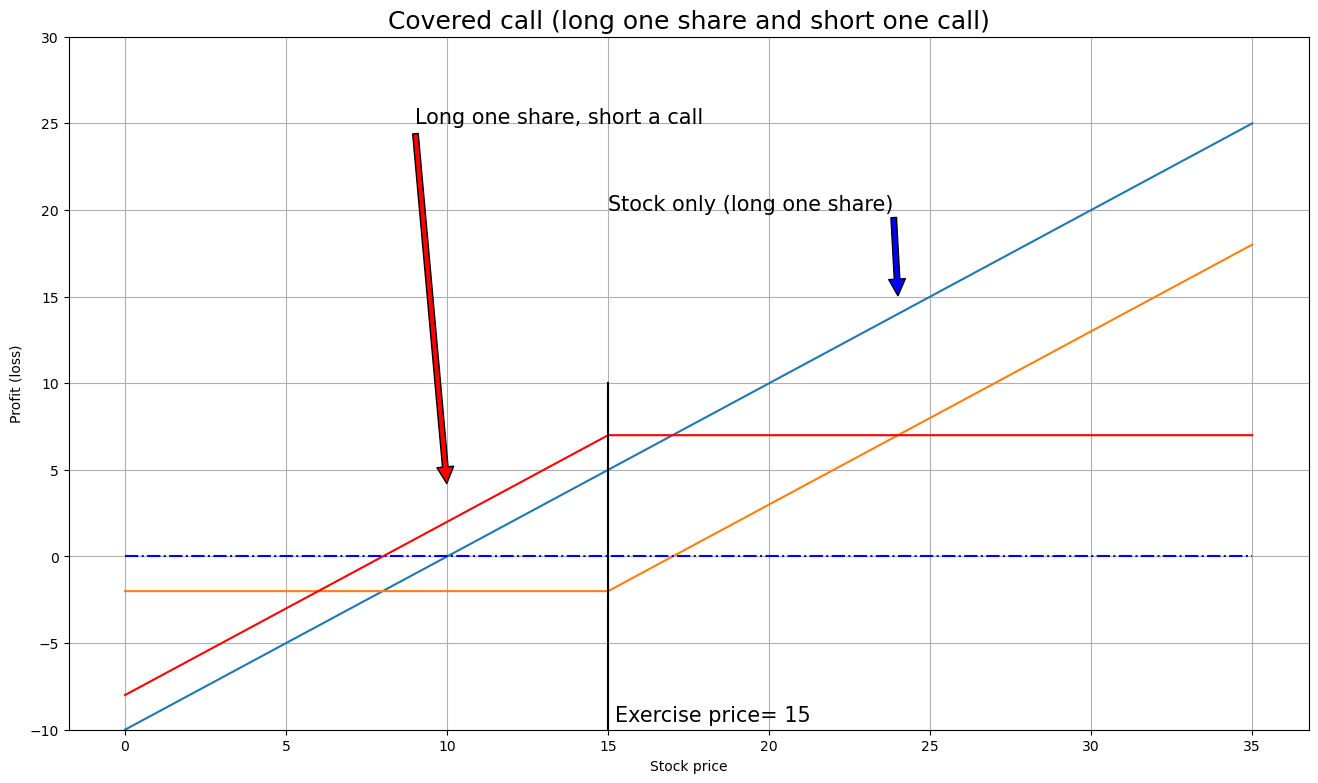

In [12]:

sT = np.arange(0,40,5) 
k=15;s0=10;c=2
y0=np.zeros(len(sT))
y1=sT-s0                    # stock only
y2=(abs(sT-k)+sT-k)/2-c     # long a call 
y3=y1-y2                    # covered-call 
plt.figure(figsize=(16,9))
plt.ylim(-10,30)
plt.plot(sT,y1) 
plt.plot(sT,y2) 
plt.plot(sT,y3,'red')
plt.plot(sT,y0,'b-.') 
plt.plot([k,k],[-10,10],'black')
plt.title('Covered call (long one share and short one call)', fontsize = 18) 
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20), arrowprops=dict(facecolor='blue',shrink=0.01), fontsize = 15)
plt.annotate('Long one share, short a call', xy=(10,4), xytext=(9,25), arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15)
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5), fontsize = 15)
plt.grid(True)
plt.show()


#### Long Straddle - Comprare una call e una put con lo stesso prezzo di esercizio

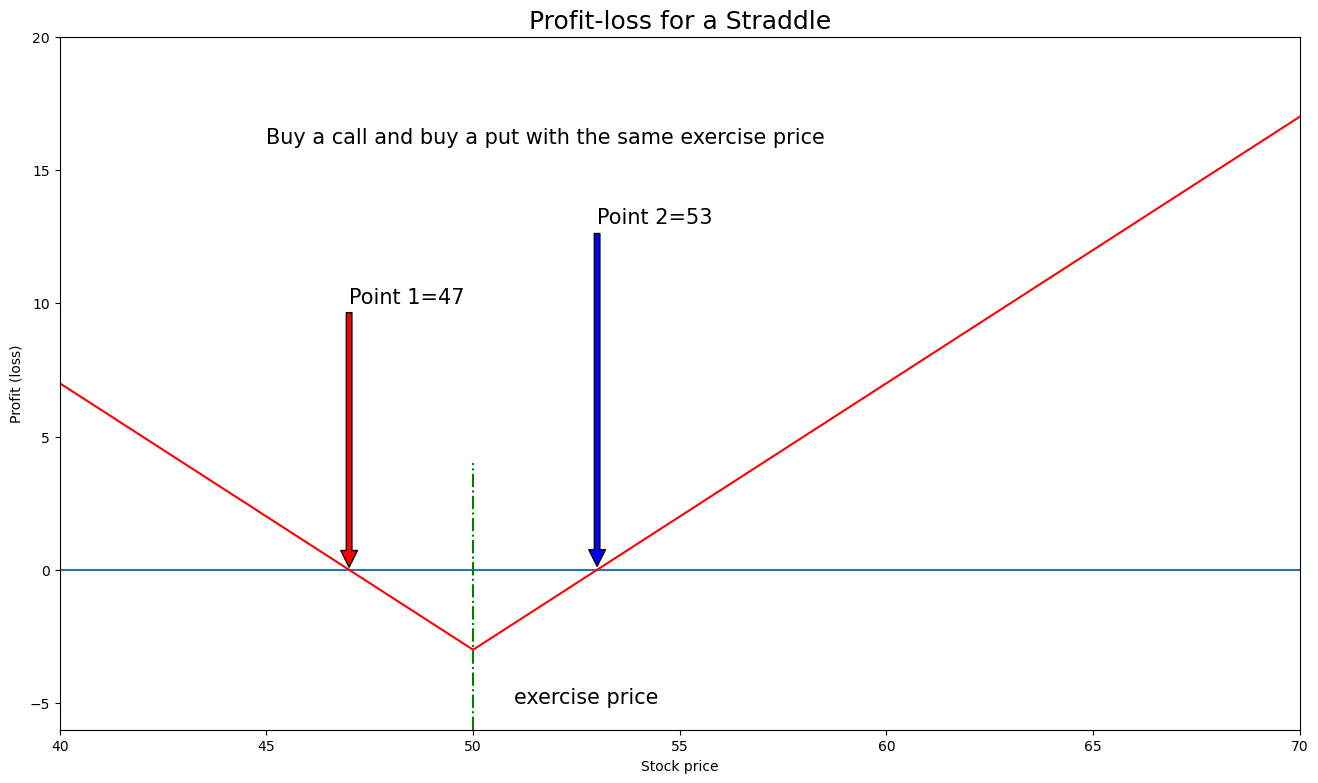

In [13]:
import matplotlib.pyplot as plt 
import numpy as np
sT = np.arange(30,80,5)
x=50;	c=2; p=1
straddle=(abs(sT-x)+sT-x)/2-c + (abs(x-sT)+x-sT)/2-p 
y0=np.zeros(len(sT))
plt.figure(figsize = (16,9))
plt.ylim(-6,20) 
plt.xlim(40,70) 
plt.plot(sT,y0) 
plt.plot(sT,straddle,'r')
plt.plot([x,x],[-6,4],'g-.')
plt.title("Profit-loss for a Straddle", fontsize = 18) 
plt.xlabel('Stock price') 
plt.ylabel('Profit (loss)')
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10),
arrowprops=dict(facecolor='red',shrink=0.01),fontsize = 15) 
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,13),
arrowprops=dict(facecolor='blue',shrink=0.01),fontsize = 15) 
plt.annotate('exercise price', xy=(x+1,-5),fontsize = 15)
plt.annotate('Buy a call and buy a put with the same exercise price',xy=(45,16), fontsize = 15)
plt.show()

#### Calcolo del delta di un'opzione

Delta : cambiamento del prezzo di un'opzione al variare del prezzo dell'azione sottostante


Formula chiusa

In [14]:
def delta1(S,X,T,r,sigma):
    d1 = (np.log(S/X) + (r + sigma*sigma/2.)* T)/ (sigma*np.sqrt(T))
    return stats.norm.cdf(d1)

In [15]:
delta1(40,40,0.5,0.03,0.2)

0.5701581024006669

Calcolo diretto

In [16]:
def delta2(S,X,T,r,sigma):
    s1 = S
    s2 = S + 1e-9
    c1 = bs_call(s1, X, T, r, sigma)
    c2 = bs_call(s2, X, T, r, sigma)
    delta = (c2 - c1) / (s2 - s1)
    return delta

In [17]:
delta2(40,40,0.5,0.03,0.2)

0.5701592331796187

### Put call parity

Il prezzo della call più il valore attuale del prezzo di esercizio è uguale al prezzo della put più il valore corrente dell'azione

$$ C + Xe^{-rT} = P + S $$


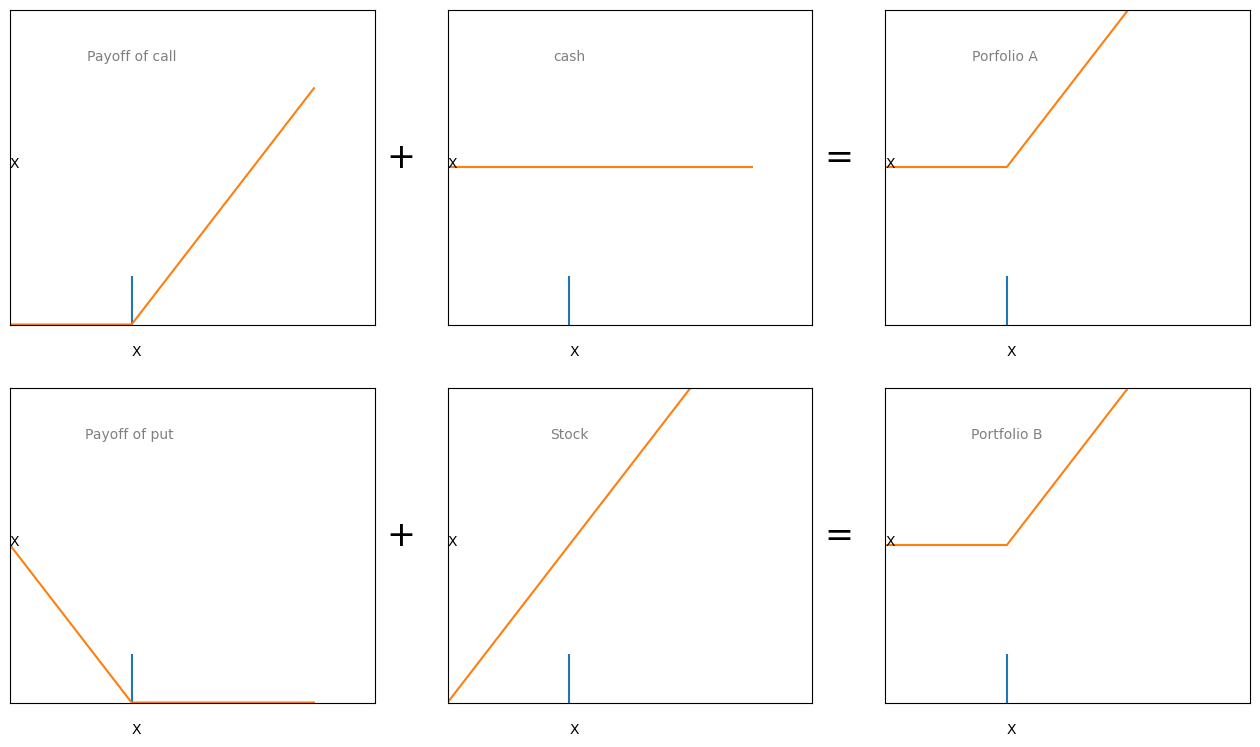

In [18]:
import pylab as pl 
import numpy as np 
x=10
sT=np.arange(0,30,5) 
payoff_call=(abs(sT-x)+sT-x)/2 
payoff_put=(abs(x-sT)+x-sT)/2 
cash=np.zeros(len(sT))+x

def graph(text,text2=''): 
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20) 
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5) 
    pl.text(-5,10,text2,size=25)
    
pl.figure(figsize=(16, 9))
pl.subplot(2, 3, 1); graph('Payoff of call');	   pl.plot(sT,payoff_call) 
pl.subplot(2, 3, 2); graph('cash','+');	         pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');   pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put ');	   pl.plot(sT,payoff_put) 
pl.subplot(2, 3, 5); graph('Stock','+');	   pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','=');   pl.plot(sT,sT+payoff_put) 
pl.show()


Parametri iniziali

In [19]:
r = 0.01
S = 35
K = 40
T = 1
sigma = 0.30

Funzione Black Scholes

In [20]:
def blackScholes(r, S, K, T, sigma, type = "C"):
    d1 = (np.log(S/K) + (r + sigma**2/2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "C":
            price =  S * norm.cdf(d1, 0, 1) - K * np.exp(-r*T) * norm.cdf(d2, 0 ,1)
        elif type == "P":
            price = K * np.exp(-r*T) * norm.cdf(-d2, 0, 1) - S * norm.cdf(-d1, 0, 1)
        return price
    
    except:
        print("Please confirm all option parameters above")


In [21]:
# prova
P = blackScholes(r, S, K, T, sigma, type = "C")
P

2.515055958704906

### Simulazioni con opzione call

#### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno
Tasso d'interesse (r) = 1%
Prezzo di esercizio (K) = 40
volatilità (sigma) = 0.30
Prezzo di mercato (S) da 1 a 40

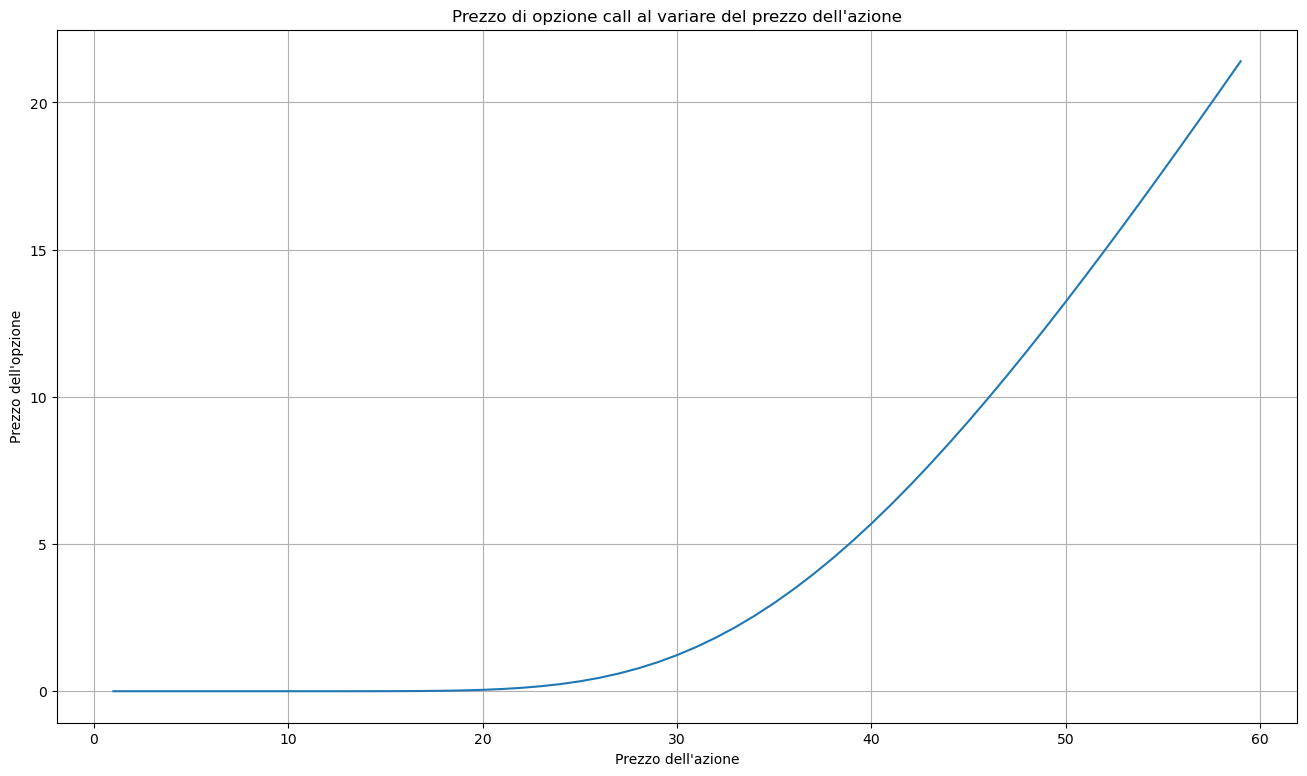

In [22]:
stock_price = []
opt_price = []


r = 0.05
#S = 40
K = 40
T = 1
sigma = 0.30

for S in range(1,60):
    P = blackScholes(r, S, K, T, sigma, type = "C")
    stock_price.append(S)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)

plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno Tasso d'interesse (r) = 1% - Prezzo di esercizio (K) = 40 Prezzo di mercato (S) = 30 Volatilità (sigma) da 5% a 50%

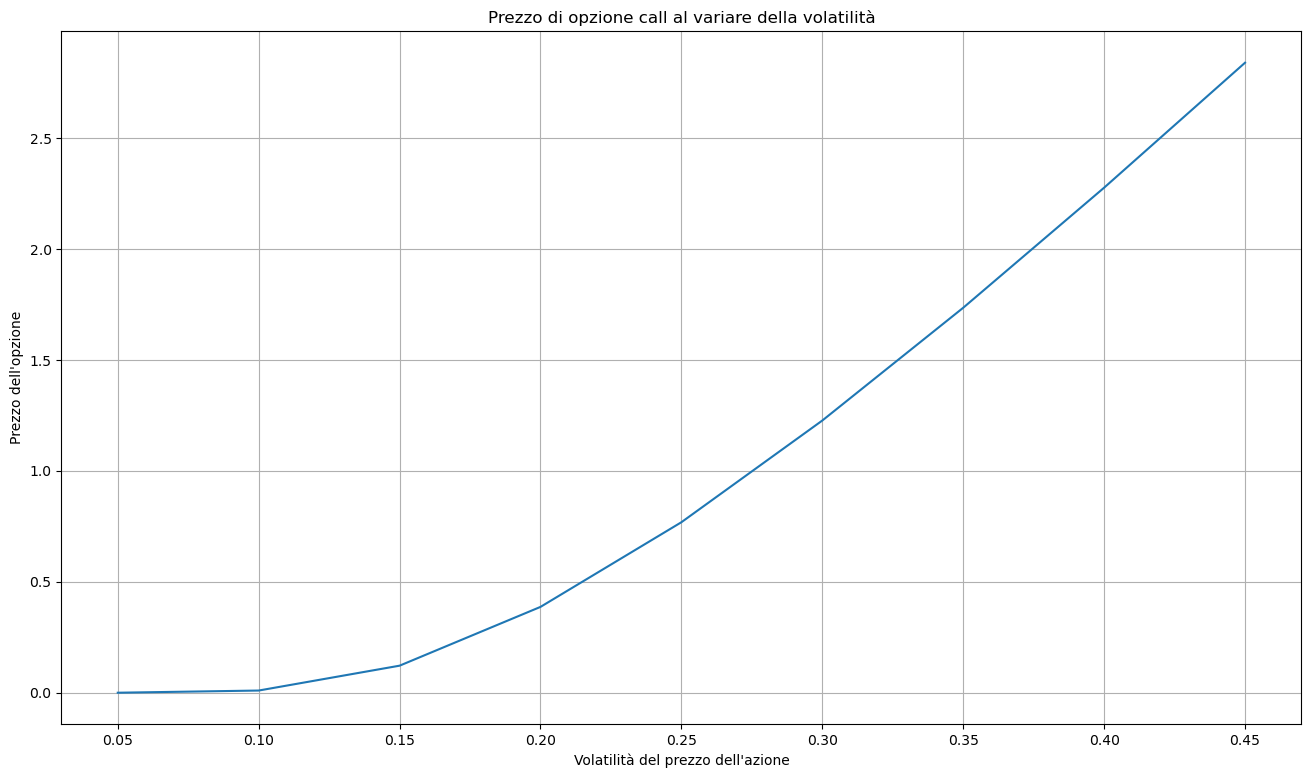

In [23]:
vola = []
opt_price = []


r = 0.05
S = 30
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    vola.append(sigma)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno Tasso d'interesse (r) da 1% a 10% - Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) = 30

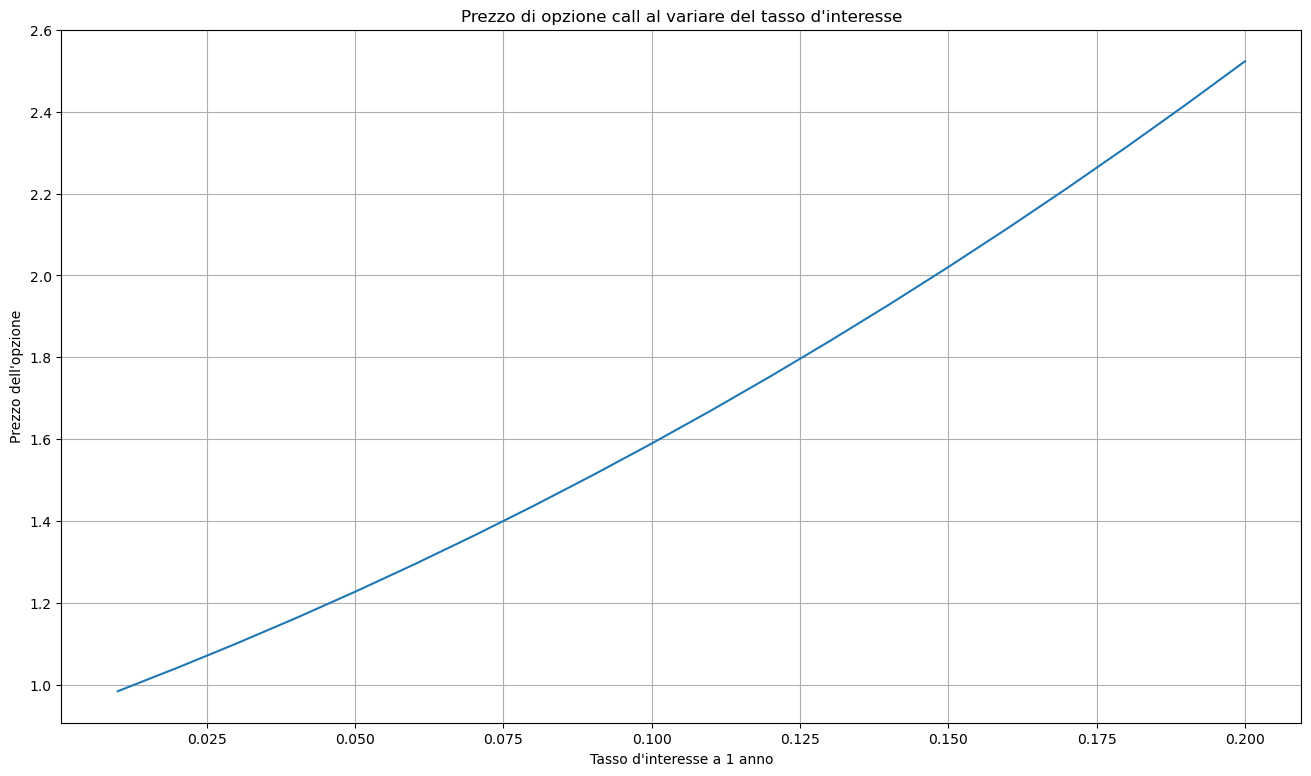

In [24]:
tasso = []
opt_price = []


#r = 0.01
S = 30
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "C")
    tasso.append(r)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del tasso d'interesse");


### Simulazioni con opzione put

### Variazione del prezzo dell'opzione al variare del prezzo dell'azione sottostante
Durata (T) = 1 anno Tasso d'interesse (r) = 1% Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) da 1 a 40

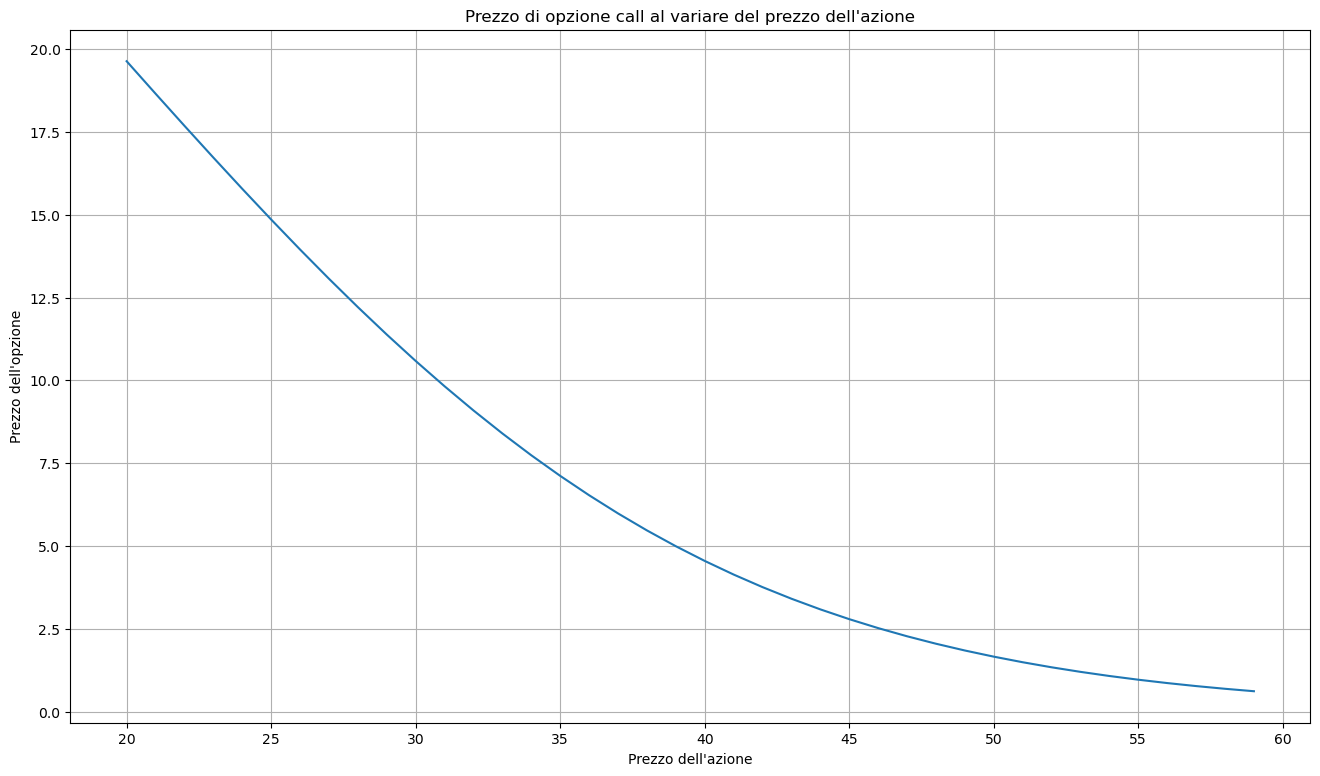

In [25]:
stock_price = []
opt_price = []


r = 0.01
#S = 40
K = 40
T = 1
sigma = 0.30

for S in range(20,60):
    P = blackScholes(r, S, K, T, sigma, type = "P")
    stock_price.append(S)
    opt_price.append(P)
plt.figure(figsize=(16,9))
plt.plot(stock_price, opt_price)
plt.xlabel("Prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del prezzo dell'azione");


#### Variazione del prezzo dell'opzione al variare della volatilità
Durata (T) = 1 anno Tasso d'interesse (r) = 1% - Prezzo di esercizio (K) = 40 Prezzo di mercato (S) = 30 Volatilità (sigma) da 5% a 50%

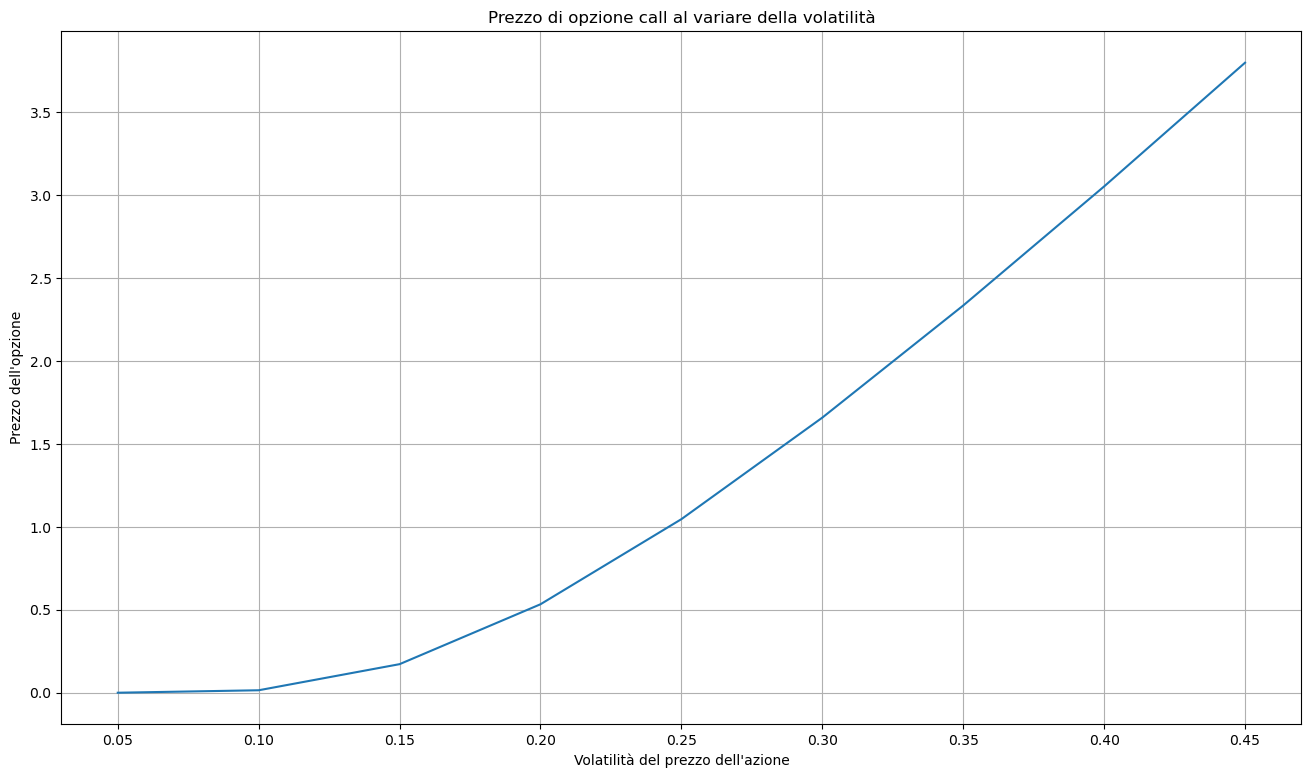

In [26]:
vola = []
opt_price = []


r = 0.01
S = 50
K = 40
T = 1
# sigma = 0.30

for sigma in range(5, 50, 5):
    sigma  = sigma/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    vola.append(sigma)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(vola, opt_price)
plt.xlabel("Volatilità del prezzo dell'azione")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare della volatilità");


#### Variazione del prezzo dell'opzione al variare del tasso d'interesse
Durata (T) = 1 anno Tasso d'interesse (r) da 1% a 10% - Prezzo di esercizio (K) = 40 volatilità (sigma) = 0.30 Prezzo di mercato (S) = 30

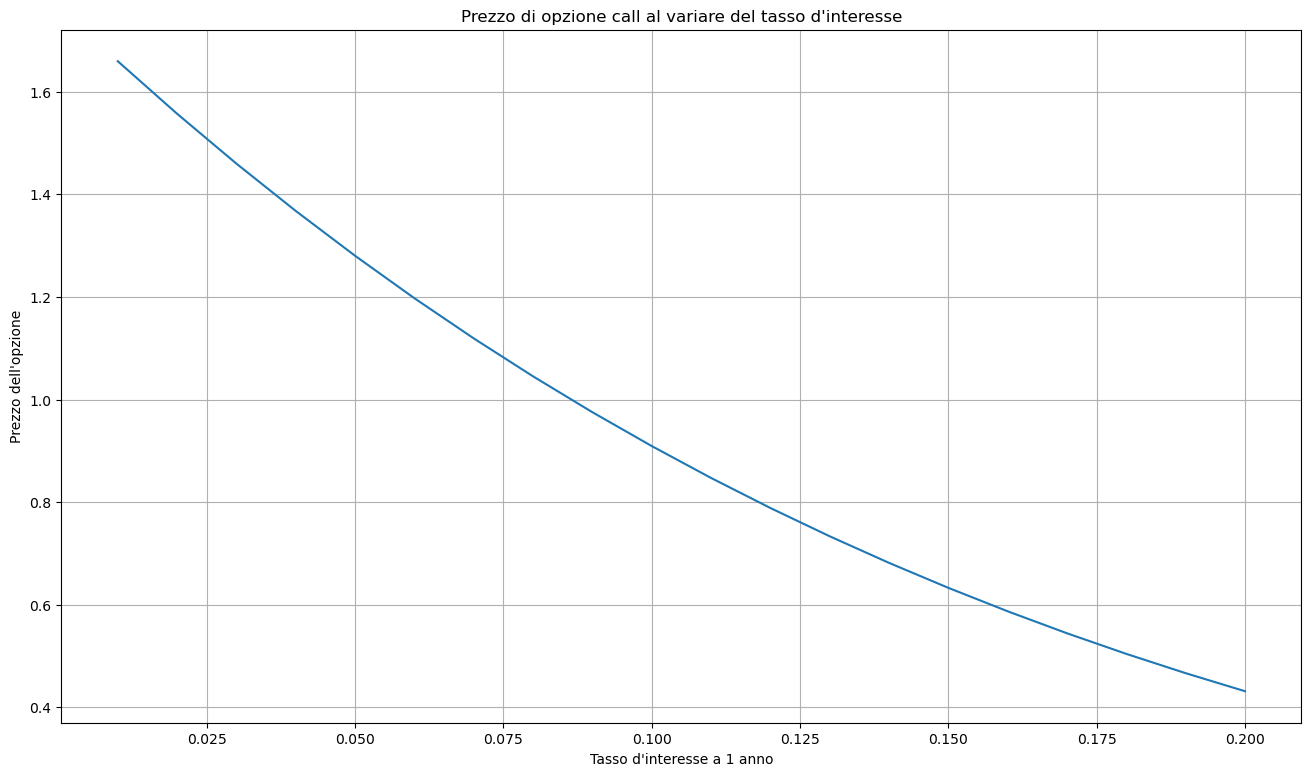

In [27]:
tasso = []
opt_price = []


#r = 0.01
S = 50
K = 40
T = 1
sigma = 0.30

for r in range(1,21):
    r = r/100
    P = blackScholes(r, S, K, T, sigma, type = "P")
    tasso.append(r)
    opt_price.append(P)

plt.figure(figsize=(16,9))
plt.plot(tasso, opt_price)
plt.xlabel("Tasso d'interesse a 1 anno")
plt.ylabel("Prezzo dell'opzione")
plt.grid(True)
plt.title("Prezzo di opzione call al variare del tasso d'interesse");


### Prezzo di opzione europea tramite simulazione Monte Carlo - 2 righe di codice
https://www.youtube.com/watch?v=LqZ3A86LjD0&t=33s

anche Hilpisch (2019) pag. 375

In [28]:
from numpy import *

In [29]:
k = random.randn(252);

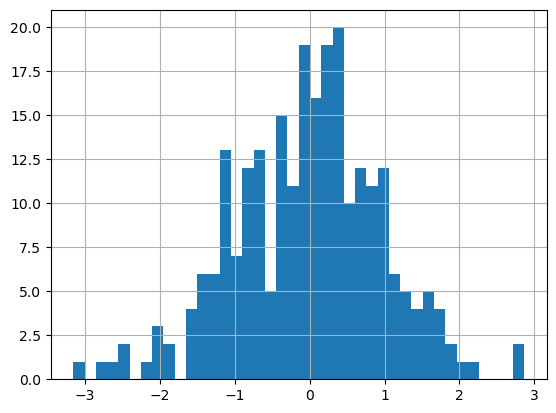

In [30]:
plt.hist(k,40)
plt.grid(True)
plt.show()

In [31]:
#applichiamo i numeri casuali alla volatilità
k = random.randn(100000)*0.30/sqrt(252)

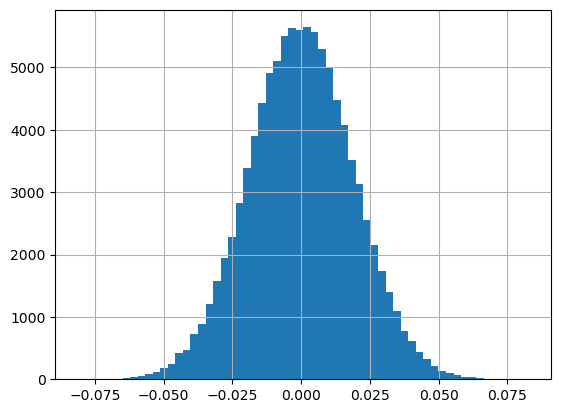

In [32]:
plt.hist(k,60)
plt.grid(True)
plt.show()

Creiamo un "Moto Geometrico Browniano" (GBM) per descrivere il prezzo dell'azione nel tempo

Due proprietà:
- le vaziazioni dei prezzi sono propozionali al livello dei prezzi
- i prezzi non vanno mai sotto zero

Calcoliamo il prezzo di un'opzione call europea con prezzo di esercizio 40, prezzo attuale 30, volatilità 30% e tasso d'interesse 1%

In [33]:

k = cumprod(1 + random.randn(1000)*0.30/sqrt(252))

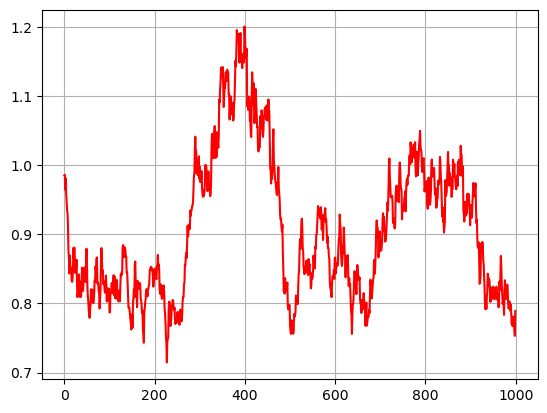

In [34]:
plt.plot(k, 'r')
plt.grid(True)

In [35]:
# Creriamo 1000 percorsi della durata di un anno
k = cumprod(1 + random.randn(1000, 252)*0.30/sqrt(252),1)

In [36]:
k.shape

(1000, 252)

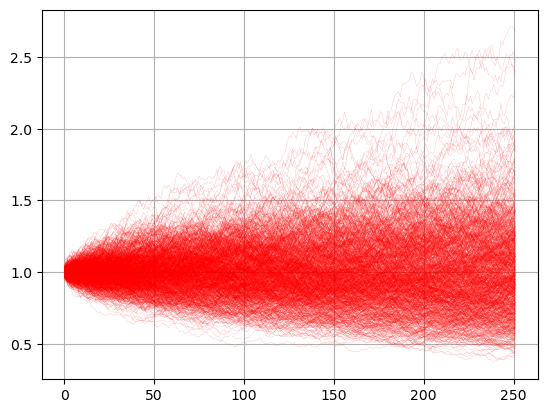

In [37]:
for i in k:
    plt.plot(i, 'r', linewidth = '0.07')
    plt.grid(True);

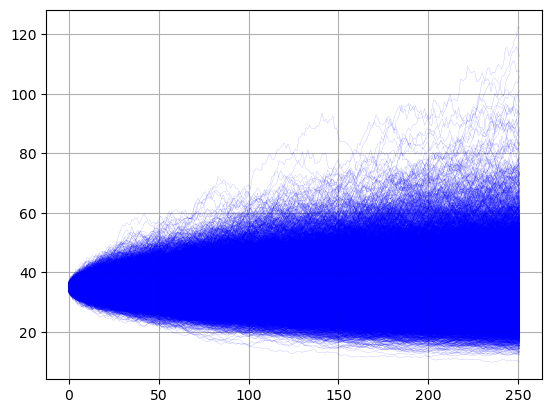

In [38]:
# Applichiamo il GBM a un prezzo iniziale 
k = cumprod(1 + random.randn(10000, 252)*0.30/sqrt(252),1) * 35
for i in k:
    plt.plot(i, 'b', linewidth = '0.07')
    plt.grid(True);

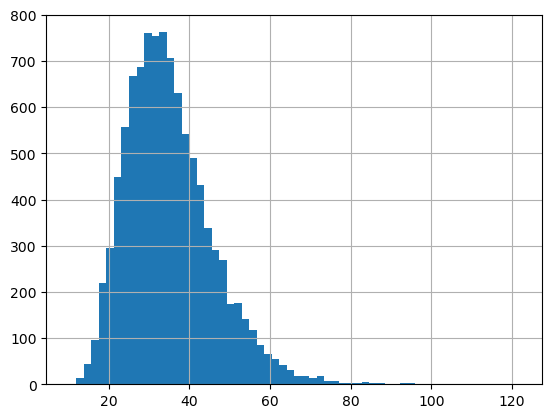

In [39]:
# Per calcolare il prezzo di un'opzione put o call europea basta l'ultimo prezzo di ogni percorso
plt.hist(k[:,-1],60)
plt.grid(True);
# la distribuzione dei prezzi finali non è normale

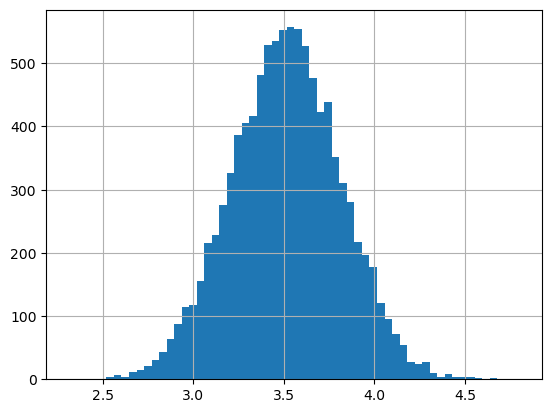

In [40]:
plt.hist(np.log(k[:,-1]),60)
plt.grid(True);
# la distribuzione dei logaritmi dei prezzi finali lo è

In [41]:
np.exp(-r*1) * mean((k[:,-1] - 40) * ((k[:,-1]-40)>0))

2.0101261428343618

### Implied volatility

In [42]:
#from scipy import log,exp,sqrt,stats

def implied_vol_call(S,X,T,r,c):
    for i in range(2000):
        sigma=0.005*(i+1)
        d1=(np.log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
        d2 = d1-sigma*np.sqrt(T)
        diff=c-(S*stats.norm.cdf(d1)-X*np.exp(-r*T)*stats.norm.cdf(d2))
        if abs(diff)<=0.01:
            return i,sigma, diff


In [43]:
implied_vol_call(40, 45, 0.5, 0.03, 0.812)


(39, 0.2, 0.00022441106579473846)

### Indice VIX

In [4]:
from pylab import mpl, plt
#plt.style.use('seaborn')
#mpl.rcParams['font.family'] = 'serif'
start = dt.date(2014,5,31)
end = dt.date(2024,4,30)
df = yf.download(['^VIX','^GSPC'], start, end)

[*********************100%%**********************]  2 of 2 completed


In [5]:
df.head()

Price         Adj Close               Close                High         \
Ticker            ^GSPC   ^VIX        ^GSPC   ^VIX        ^GSPC   ^VIX   
Date                                                                     
2014-06-02  1924.969971  11.58  1924.969971  11.58  1925.880005  12.17   
2014-06-03  1924.239990  11.87  1924.239990  11.87  1925.069946  12.13   
2014-06-04  1927.880005  12.08  1927.880005  12.08  1928.630005  12.33   
2014-06-05  1940.459961  11.68  1940.459961  11.68  1941.739990  12.34   
2014-06-06  1949.439941  10.73  1949.439941  10.73  1949.439941  11.39   

Price               Low                Open             Volume       
Ticker            ^GSPC   ^VIX        ^GSPC   ^VIX       ^GSPC ^VIX  
Date                                                                 
2014-06-02  1915.979980  11.29  1923.869995  11.69  2509020000    0  
2014-06-03  1918.790039  11.72  1923.069946  12.03  2867180000    0  
2014-06-04  1918.599976  11.91  1923.060059  12.15  2793920000    0  
2014-06-05  1922.930054  11.44  1928.520020  12.09  3113270000    0  
2014-06-06  1942.410034  10.73  1942.410034  11.32  2864300000    0

In [6]:
df = df['Adj Close']
df.head()

Ticker,^GSPC,^VIX
Date,,
2014-06-02,1924.969971,11.58
2014-06-03,1924.239990,11.87
2014-06-04,1927.880005,12.08
2014-06-05,1940.459961,11.68
2014-06-06,1949.439941,10.73


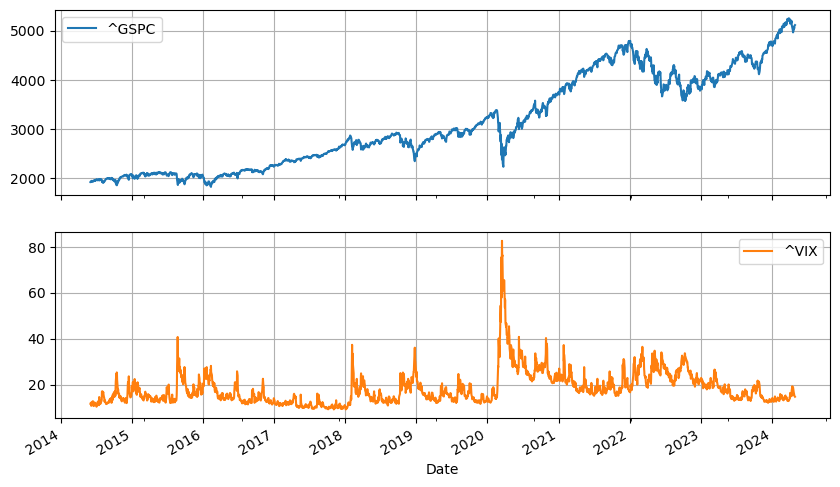

In [7]:
df.plot(subplots=True, figsize=(10,6), grid = True);

#### Correlazione fra rendimenti del S&P 500 e del VIX

Hilpisch (2019) Python for Finance, pagg. 222 - 228

Visualizziamo la tendenza di VIX e S&P500 a muoversi in direzioni opposte

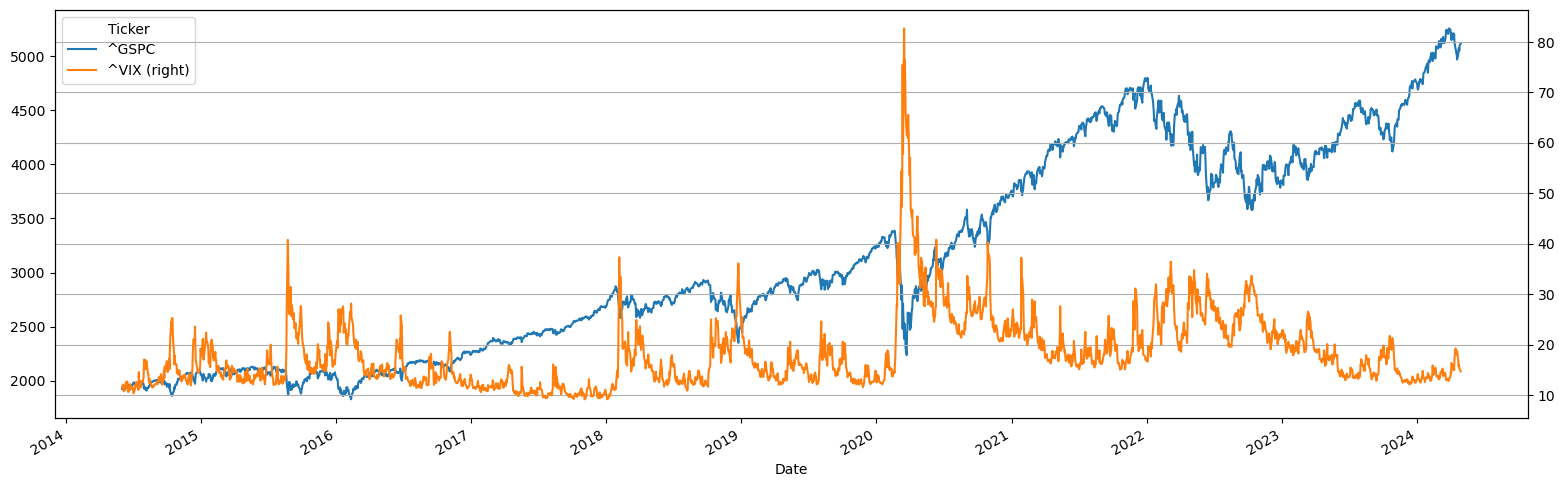

In [8]:
df.loc[:'2024-4-30'].plot(secondary_y='^VIX', figsize=(19,6), grid = True);

Lavoriamo sui rendimenti anziché sui livelli

In [9]:
rets = np.log(df / df.shift(1))


In [10]:
rets.rename(columns={'^VIX': 'VIX', 
                           '^GSPC': 'SPX'}, inplace=True)

In [11]:
rets.dropna(inplace = True)
rets.head()

Ticker,SPX,VIX
Date,,
2014-06-03,-0.000379,0.024735
2014-06-04,0.001890,0.017537
2014-06-05,0.006504,-0.033673
2014-06-06,0.004617,-0.084834
2014-06-09,0.000938,0.038396


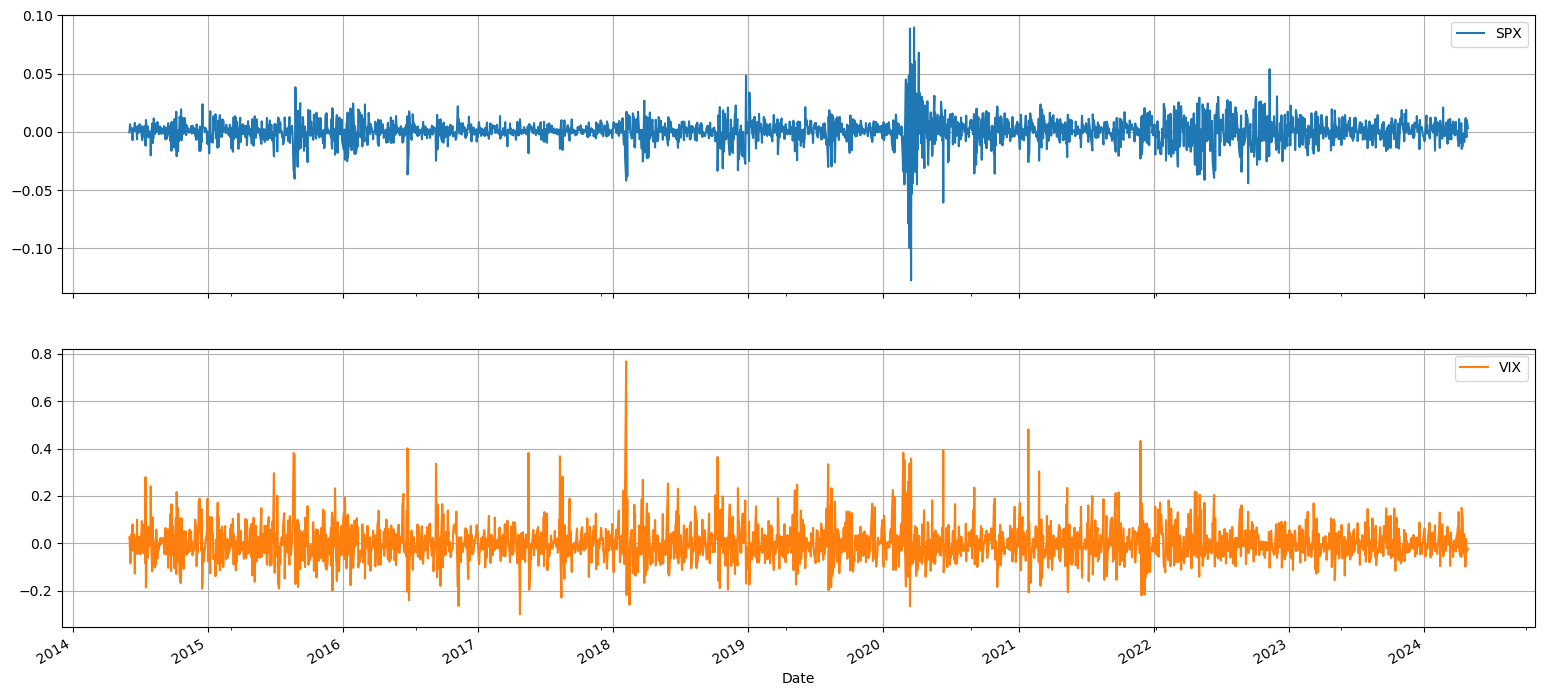

In [12]:
rets.plot(subplots=True, grid = True, figsize=(19,9));

Evidenziamo la correlazione negativa fra rendimenti del S&P500 e variazioni del VIX

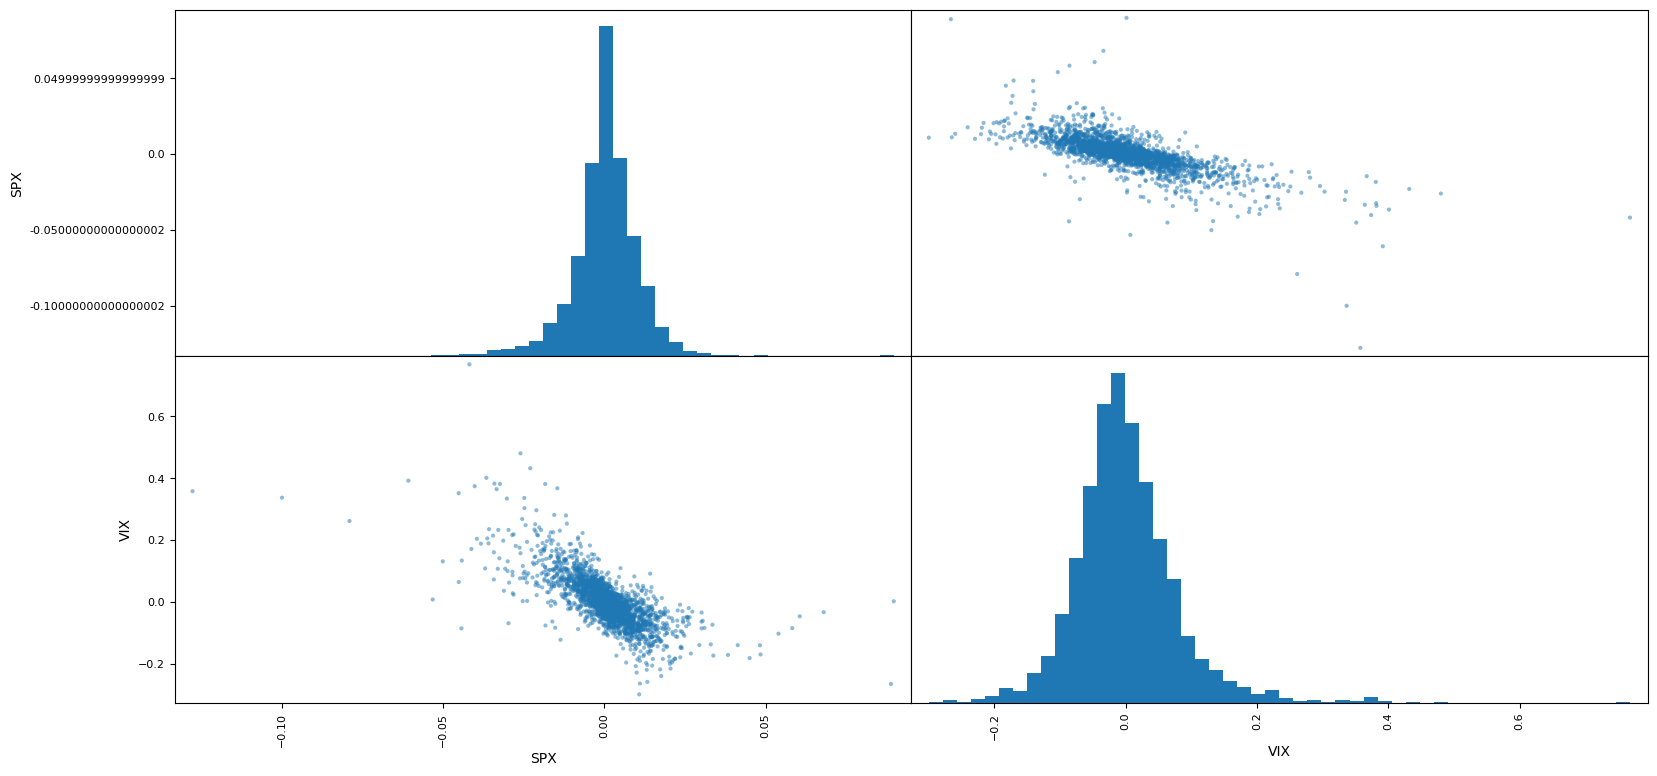

In [13]:
pd.plotting.scatter_matrix(rets, alpha=0.5,
           diagonal = 'hist',
                  hist_kwds={'bins': 50},
                  figsize = (19,9), grid = True);

Stimiamo la relazione lineare fra i due

In [14]:
reg = np.polyfit(rets['SPX'], rets['VIX'], deg=1)

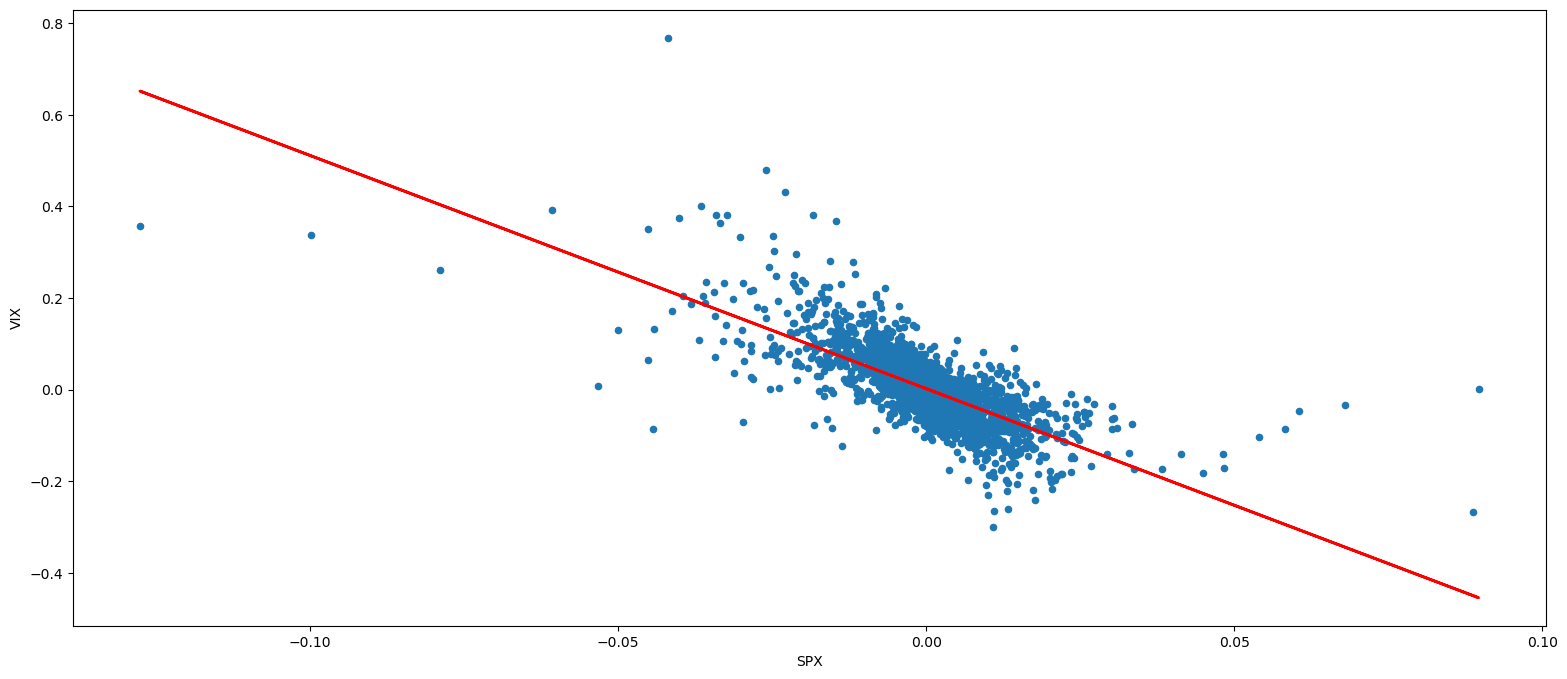

In [15]:
ax = rets.plot(kind = 'scatter', x = 'SPX', y= 'VIX', figsize=(19,8))
ax.plot(rets['SPX'], np.polyval(reg, rets['SPX']), 'r', lw=2);

Evoluzione nel tempo della correlazione

In [16]:
rets.corr()

Ticker,SPX,VIX
Ticker,,
SPX,1.000000,-0.725294
VIX,-0.725294,1.000000


In [17]:
rets.cov()

Ticker,SPX,VIX
Ticker,,
SPX,0.000126,-0.000643
VIX,-0.000643,0.006223


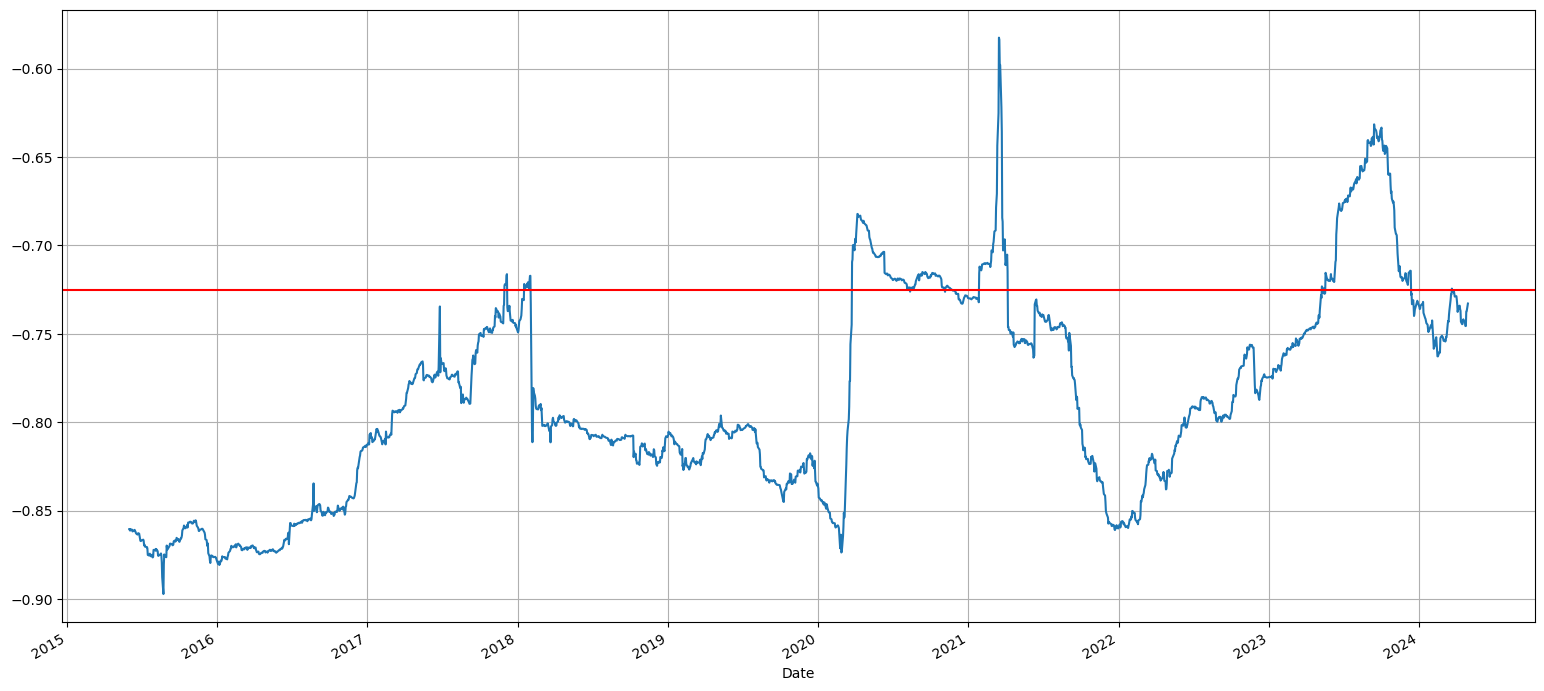

In [18]:
ax = rets['SPX'].rolling(window=252).corr(rets['VIX']).plot(figsize=(19,9))
ax.axhline(rets.corr().iloc[0,1], c='r')
plt.grid()

### SKEW

The Cboe SKEW index (SKEW) measures potential risk in financial markets.

Much like the VIX index, the SKEW index from the Chicago Board Options Exchange (Cboe) can be a proxy for investor sentiment and volatility. 

The SKEW measures perceived tail-risk in the S&P 500. Tail-risk is a change in the price of the S&P 500 or a stock that would place it on either of the tail ends, or the far edges of the normal distribution curve. These price changes typically have a low probability. 

The SKEW index is calculated using S&P 500 options that measure tail risk—returns two or more standard deviations from the mean—in S&P 500 returns over the next 30 days. The primary difference between the VIX and the SKEW is that the VIX is based upon implied volatility round the at-the-money (ATM) strike price while the SKEW considers implied volatility of out-of-the-money (OTM) strikes. 

SKEW values generally range from 100 to 150 where the higher the rating, the higher the perceived tail risk and chance of a black swan event. A SKEW rating of 100 means the perceived distribution of S&P 500 returns is normal and, therefore, the probability of an outlier return is small. 



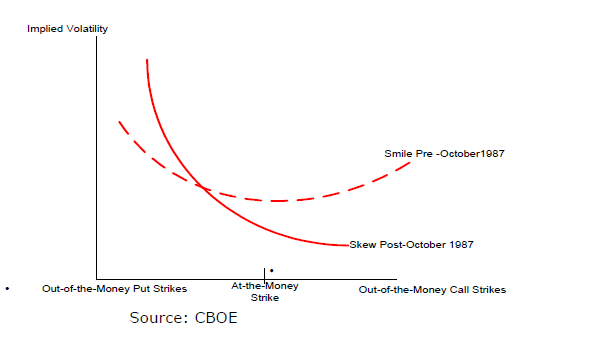

In [19]:
skew = yf.download(['^VIX','^SKEW'], start, end)

[*********************100%%**********************]  2 of 2 completed


In [20]:
SKEW = skew['Adj Close']
SKEW.head()

Ticker,^SKEW,^VIX
Date,,
2014-06-02,123.330002,11.58
2014-06-03,121.790001,11.87
2014-06-04,121.480003,12.08
2014-06-05,122.209999,11.68
2014-06-06,122.879997,10.73


In [22]:
SKEW.tail()

Ticker,^SKEW,^VIX
Date,,
2024-04-23,135.610001,15.69
2024-04-24,135.059998,15.97
2024-04-25,NaN,15.37
2024-04-26,140.860001,15.03
2024-04-29,138.300003,14.67


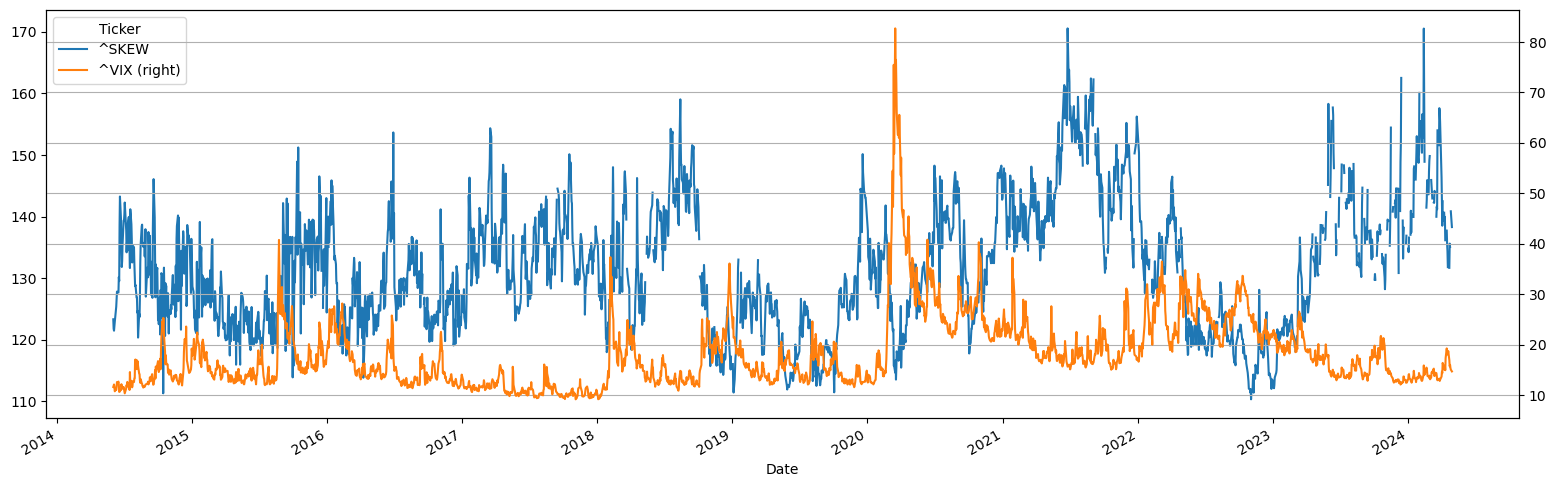

In [21]:
SKEW.plot(secondary_y='^VIX', figsize=(19,6), grid = True);

### Scarico dati su opzioni da Yahoofinance

https://www.fintut.com/yahoo-finance-options-python/


## Strategie opzionali - Indici

BXM The CBOE S&P 500 BuyWrite Index
BXM is a benchmark index designed to track the performance of a hypothetical buy-write strategy on the S&P 500 Index.

BXMD The CBOE S&P 50 030-Delta  BuyWrite Inde
BXMD is a variation of the Cboe BuyWrite Index (BXM) that  tracks the value of a hypothetical portfolio (BXMD portfolio) that overlays  a short 30-delta call option on the S&P 500® (30-delta SPX call) instead of an-at-the-money option.  The smaller premium of a 30-delta call relative to an-at-the-money call provides  a smaller buffer but also less giveup on the upside. }
PUT CBOE S&P 500 PutWrite Iex
nd
PUT , measures the performance of a hypothetical portfolio that sells S&P 500 Index (SPX) put options against collateralized cash reserves held in a money market accotuOE
PPUT The CBOE S&P 500 5% Put Protectiondex In
PPindex ex is designed to track the performance of a hypothetical strategy that holds a long position indexed to the S&P 500 Index and buys a monthly 5% out-of-the-money (OTM) S&P 500 Index (SPX) put option as a hed


CLL The CBOE S&P 500 95-110 Collar index
CLL is a passive collar strategy that entails holding the stocks in the S&P 500 Index; buying three-month S&P 500 put options to protect this S&P 500 portfolio from market decreases; and selling one month S&P 500 call options to help finance the cost of the puts
e.
PPUT3M The Cboe S&P 500 Tail  Index
s
ex (PPT3M) is a benchmark index designed to track the performance of a hypothetical risk-management strategy that consists of (a) holding the S&P 500 portfolio and collecting dividends and (b) buying 10% out-of-the-money SPX puts that expire on the quarterly cycle, i.e. March, June, September and Dber puts.euts.
VXTH The CBOE VIX Tail  Index
H
ndex(VXTH) tracks a hypothetical portfolio long the S&P 500 index, with dividends, and long one-month 30-delta VIX calls. The number of calls depends on the level of forward volatim/VXTH


In [85]:
opt_stra = pd.read_excel('Opt_strat.xlsx', index_col = 0, parse_dates = True)

In [86]:
opt_stra_1987 = opt_stra.drop(['VXTH','PPUT3M'], axis = 1)

In [87]:
opt_ret = (opt_stra_1987/opt_stra_1987.shift(1))-1
opt_ret.dropna(inplace=True)

In [88]:
(opt_ret).describe()

,BXM,BXMD,CLL,PPUT,PUT,SPXT,TB3MS
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.007467,0.009214,0.006548,0.006790,0.008301,0.009675,0.002407
std,0.030003,0.036350,0.030495,0.034680,0.028413,0.042442,0.002028
min,-0.151308,-0.155991,-0.079466,-0.098023,-0.176502,-0.167951,0.000008
25%,-0.002430,-0.009287,-0.015575,-0.017453,0.000887,-0.015794,0.000221
50%,0.011492,0.014352,0.008153,0.010225,0.011772,0.013889,0.002283
75%,0.021391,0.029439,0.028695,0.030025,0.020798,0.036952,0.004150
max,0.100146,0.112791,0.084698,0.104019,0.089780,0.128194,0.007350


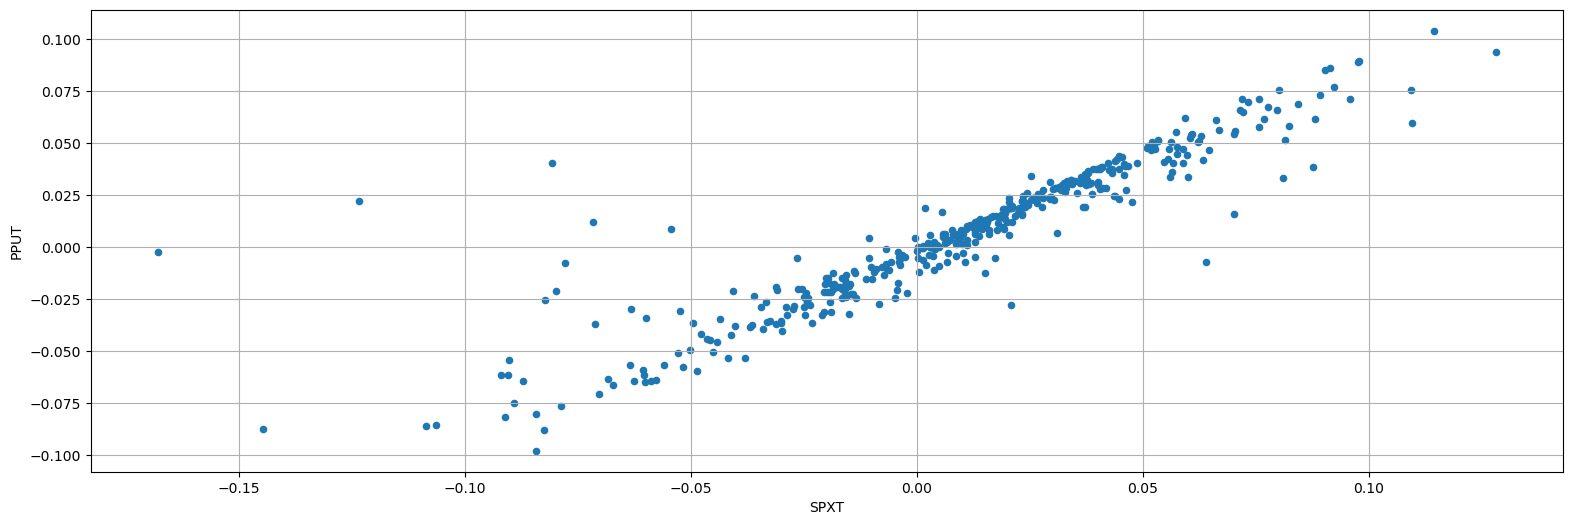

In [89]:
opt_ret.plot(kind = 'scatter', x = 'SPXT', y = 'PPUT', figsize = (19,6))
plt.grid()

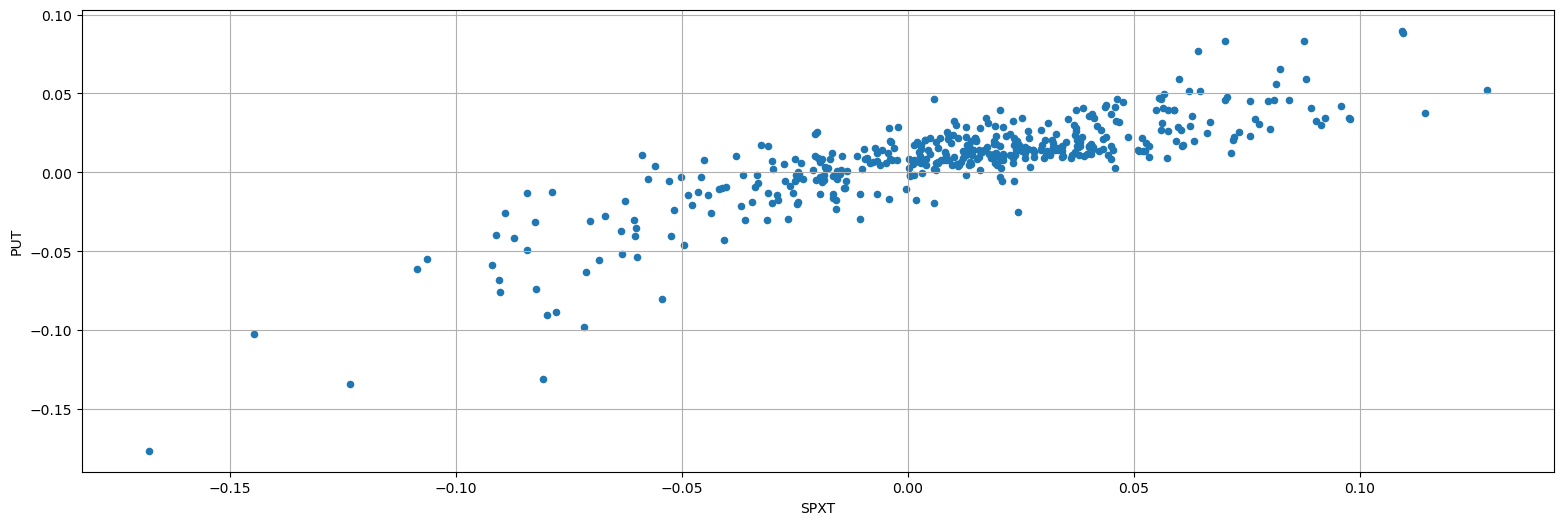

In [92]:
opt_ret.plot(kind = 'scatter', x = 'SPXT', y = 'PUT', figsize = (19,6))
plt.grid()

In [93]:
opt_ret_std = np.std(opt_ret, axis = 0)*np.sqrt(12)

In [94]:
opt_ret_std

BXM      0.103812
BXMD     0.125777
CLL      0.105515
PPUT     0.119998
PUT      0.098312
SPXT     0.146855
TB3MS    0.007018
dtype: float64

In [95]:
opt_ret_mean = np.mean(opt_ret, axis = 0)*12
opt_ret_mean

BXM      0.089603
BXMD     0.110563
CLL      0.078574
PPUT     0.081475
PUT      0.099609
SPXT     0.116099
TB3MS    0.028883
dtype: float64

In [96]:
opt_ret_mean_excess = opt_ret_mean - opt_ret_mean['TB3MS']

In [97]:
opt_ret_mean_excess/opt_ret_std

BXM      0.584897
BXMD     0.649403
CLL      0.470940
PPUT     0.438272
PUT      0.719403
SPXT     0.593894
TB3MS    0.000000
dtype: float64

In [98]:
opt_ret.corr()

,BXM,BXMD,CLL,PPUT,PUT,SPXT,TB3MS
BXM,1.000000,0.962312,0.709329,0.660132,0.971275,0.871781,0.088244
BXMD,0.962312,1.000000,0.826176,0.799248,0.921850,0.946507,0.073329
CLL,0.709329,0.826176,1.000000,0.937601,0.636078,0.905401,0.052657
PPUT,0.660132,0.799248,0.937601,1.000000,0.577222,0.908779,0.022019
PUT,0.971275,0.921850,0.636078,0.577222,1.000000,0.830272,0.087479
SPXT,0.871781,0.946507,0.905401,0.908779,0.830272,1.000000,0.034906
TB3MS,0.088244,0.073329,0.052657,0.022019,0.087479,0.034906,1.000000


In [99]:
opt_ret_all = opt_stra/opt_stra.shift(1)-1

In [100]:
opt_ret_all.dropna(inplace= True)

In [101]:
opt_ret_all.describe()

,BXM,BXMD,CLL,PPUT,PUT,PPUT3M,VXTH,SPXT,TB3MS
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.004853,0.007070,0.005725,0.006782,0.005974,0.007092,0.009233,0.009186,0.001110
std,0.032466,0.038323,0.030875,0.034963,0.031821,0.035493,0.051625,0.044814,0.001474
min,-0.151308,-0.155991,-0.078358,-0.098023,-0.176502,-0.079049,-0.106967,-0.167951,0.000008
25%,-0.005953,-0.012181,-0.014222,-0.014975,-0.002201,-0.015383,-0.013861,-0.015822,0.000058
50%,0.010464,0.014227,0.009170,0.011716,0.011010,0.011259,0.011174,0.014727,0.000204
75%,0.019726,0.027570,0.027529,0.029477,0.020167,0.030171,0.028579,0.036753,0.001754
max,0.100146,0.112791,0.084698,0.093580,0.089780,0.096781,0.518924,0.128194,0.004450


In [103]:
opt_ret_all.corr()

,BXM,BXMD,CLL,PPUT,PUT,PPUT3M,VXTH,SPXT,TB3MS
BXM,1.000000,0.971098,0.732980,0.627713,0.980717,0.759299,0.237073,0.887511,-0.003481
BXMD,0.971098,1.000000,0.826416,0.761560,0.948688,0.850547,0.367311,0.952097,0.004597
CLL,0.732980,0.826416,1.000000,0.910760,0.697538,0.969416,0.597706,0.904196,0.032394
PPUT,0.627713,0.761560,0.910760,1.000000,0.583449,0.935656,0.679714,0.885588,-0.001522
PUT,0.980717,0.948688,0.697538,0.583449,1.000000,0.731923,0.216146,0.869127,-0.006368
PPUT3M,0.759299,0.850547,0.969416,0.935656,0.731923,1.000000,0.578795,0.940854,0.016586
VXTH,0.237073,0.367311,0.597706,0.679714,0.216146,0.578795,1.000000,0.462112,-0.041110
SPXT,0.887511,0.952097,0.904196,0.885588,0.869127,0.940854,0.462112,1.000000,-0.000032
TB3MS,-0.003481,0.004597,0.032394,-0.001522,-0.006368,0.016586,-0.041110,-0.000032,1.000000


### Altri indici di volatilità: cambi e obbligazioni

In [23]:
vola = pd.read_excel('indici_vola.xlsx', parse_dates = True, index_col = 0)

In [24]:
vola.head()

,SKEW,MOVE,JPMVXYG7,JPMVXYEM,VIX
Date,,,,,
1998-12-31,124.46,121.13,13.78,NaN,24.42
1999-01-29,119.23,87.16,11.72,NaN,26.25
1999-02-26,114.88,101.44,12.51,NaN,27.88
1999-03-31,114.02,85.17,12.09,NaN,23.26
1999-04-30,116.25,84.85,9.91,NaN,25.07


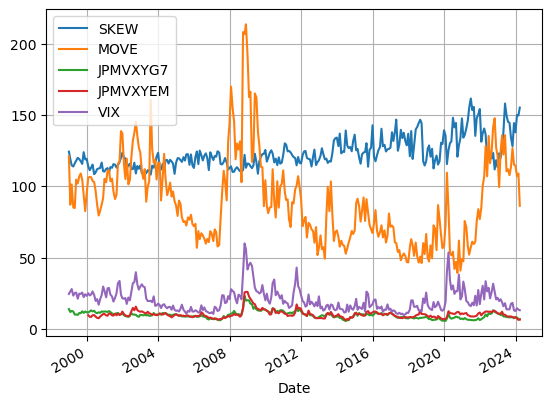

In [81]:
vola.plot()
plt.grid()

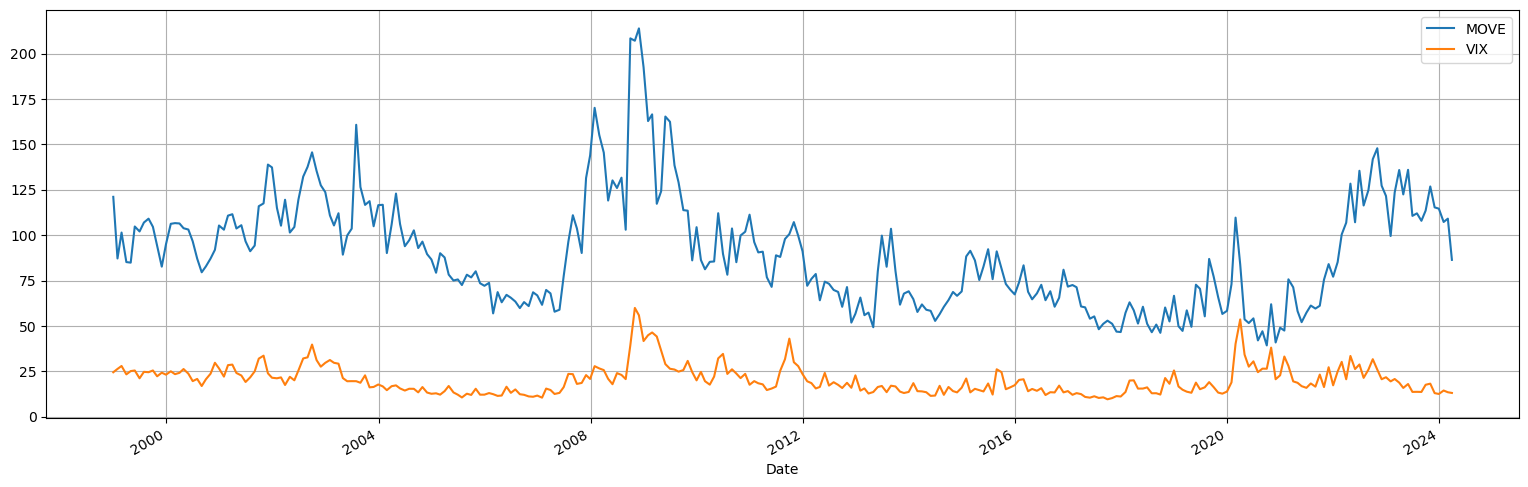

In [87]:
vola[['MOVE','VIX']].plot(figsize=(19,6), grid = True);

In [ ]:
vola[['JPMVXYG7','JPMVXYEM']].plot(figsize=(19,6), grid = True);